In [1]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd

<!DOCTYPE html>
<html class="desktop neo-green dock-upscale" data-color-scheme="light" lang="en-US" theme="light"><head>
        <meta charset="utf-8"/>
        <meta content="guce.yahoo.com" name="oath:guce:consent-host"/>
         <link crossorigin="anonymous" href="//s.yimg.com" rel="preconnect"/><link href="//geo.yahoo.com" rel="preconnect"/><link href="//query1.finance.yahoo.com" rel="preconnect"/><link href="//query2.finance.yahoo.com" rel="preconnect"/><link href="//consent.cmp.oath.com" rel="preconnect"/><link as="worker" href="/__rapidworker-1.2.js" rel="preload"/><link href="https://s.yimg.com/uc/finance/webcore/js/_staticFinProtobuf.4b1559b8e4645fd93a12.js" rel="preconnect"/><link href="https://cdn.jsdelivr.net/npm/protobufjs@7.1.2/dist/minimal/protobuf.min.js" rel="preconnect"/><script>window.finNeoPageStart = Date.now();</script><script>(function(){if(!window.YAHOO){window.YAHOO={}}; window.YAHOO.context={"consent":{"allowContentPersonalization":true,"allowCrossDeviceMappi
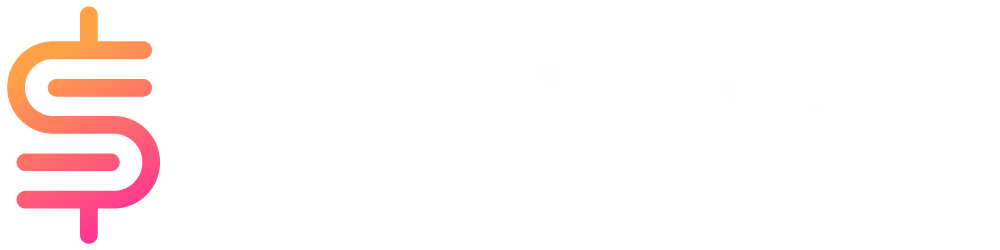

In [31]:
url = f"https://finance.yahoo.com/quote/AAPL/history/?period1=1580333108&period2=1738185894"

headers = {
"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36"
}

response = requests.get(url, headers = headers)
soup = BeautifulSoup(response.text, 'html5lib')
soup

In [30]:
print(response.text[:1000])  # First 1000 characters

<!DOCTYPE html>
<html dir="ltr" class="ltr  yahoo-page height100">
<head>
    <title>Yahoo fait partie de la famille de marques Yahoo.</title>

    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" >
    <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1, user-scalable=no, viewport-fit=cover">
    <link rel="stylesheet" href="https://s.yimg.com/oa/build/css/site-ltr-1e589816.css">
    <link rel="icon" type="image/png" href="https://s.yimg.com/oa/build/images/favicons/yahoo.png">
    <style nonce="HYOo9dfz9DOogcKY4A9z6KfG7ixGnRKK">:root,html[data-color-scheme=dark] [data-maintain-color],html[data-color-theme-enabled] [data-color-scheme=light],html[data-color-theme-enabled][data-color-scheme=light]{--yb-default-font-family:"Helvetica Neue", Helvetica, Tahoma, Geneva, Arial, sans-serif;--yb-fuji2-font-family:"YahooSans VF", YahooSans, "Yahoo Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;--yb-uh3-cond-font-family:"Yahoo 

In [32]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

def get_stock_history(stocks):
    driver = webdriver.Chrome()
    all_data = {}
    
    for stock in stocks:
        try:
            # Construct URL with your date parameters
            url = f"https://finance.yahoo.com/quote/{stock}/history/?period1=1580333108&period2=1738185894"
            driver.get(url)
            
            # Wait for table to load
            table = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, "table[class*='yf-']"))
            )
            
            # Get rows
            rows = table.find_elements(By.TAG_NAME, "tr")
            
            # Extract data
            data = []
            for row in rows[1:]:  # Skip header row
                cols = row.find_elements(By.TAG_NAME, "td")
                if cols:  # Make sure row has data
                    row_data = [col.text for col in cols]
                    data.append(row_data)
            
            # Convert to DataFrame
            df = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
            all_data[stock] = df
            
            # Small delay between requests
            time.sleep(2)
            
        except Exception as e:
            print(f"Error fetching data for {stock}: {e}")
    
    driver.quit()
    return all_data

# Use your stock list
stocks = ['AAPL', 'NVDA', 'TSLA', 'MC.PA']
stock_data = get_stock_history(stocks)

# Access individual stock data
for stock, df in stock_data.items():
    print(f"\nData for {stock}:")
    print(df.head())
    # Optionally save to CSV
    df.to_csv(f"{stock}_history.csv", index=False)


Data for AAPL:
           Date    Open    High     Low   Close Adj Close      Volume
0  Jan 29, 2025  234.15  239.85  234.01  239.36    239.36  45,048,386
1  Jan 28, 2025  230.85  240.19  230.81  238.26    238.26  75,707,600
2  Jan 27, 2025  224.02  232.15  223.98  229.86    229.86  94,863,400
3  Jan 24, 2025  224.78  225.63  221.41  222.78    222.78  54,697,900
4  Jan 23, 2025  224.74  227.03  222.30  223.66    223.66  60,234,800

Data for NVDA:
           Date    Open    High     Low   Close Adj Close       Volume
0  Jan 29, 2025  126.48  126.89  120.05  123.70    123.70  431,674,652
1  Jan 28, 2025  121.81  129.00  116.25  128.99    128.99  579,666,400
2  Jan 27, 2025  124.80  128.40  116.70  118.42    118.42  818,830,900
3  Jan 24, 2025  148.37  148.97  141.88  142.62    142.62  234,657,600
4  Jan 23, 2025  145.05  147.23  143.72  147.22    147.22  155,915,500

Data for TSLA:
           Date    Open    High     Low   Close Adj Close      Volume
0  Jan 29, 2025  395.19  398.59  384

In [35]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

def get_trending_tickers():
    """Get list of trending tickers from Yahoo Finance"""
    driver = webdriver.Chrome()
    try:
        driver.get("https://finance.yahoo.com/markets/stocks/trending/")
        
        table = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "table[data-testid='table-container']"))
        )
        
        rows = table.find_elements(By.TAG_NAME, "tr")
        trending_stocks = {}
        
        for row in rows[1:]:
            cols = row.find_elements(By.TAG_NAME, "td")
            if cols:
                ticker = cols[0].text
                name = cols[1].text
                trending_stocks[ticker] = name
                
        return trending_stocks
    
    finally:
        driver.quit()

In [37]:
trending_tickers = get_trending_tickers()
trending_tickers

{'TSLA': 'Tesla, Inc.',
 'MSFT': 'Microsoft Corporation',
 'META': 'Meta Platforms, Inc.',
 'IBM': 'International Business Machines Corporation',
 'NOW': 'ServiceNow, Inc.',
 'LRCX': 'Lam Research Corporation',
 'PPCB': 'Propanc Biopharma, Inc.',
 'WOLF': 'Wolfspeed, Inc.',
 'WDC': 'Western Digital Corporation',
 'LVS': 'Las Vegas Sands Corp.',
 'URI': 'United Rentals, Inc.',
 'WHR': 'Whirlpool Corporation',
 'LEVI': 'Levi Strauss & Co.',
 'TEVA': 'Teva Pharmaceutical Industries Limited',
 'CLS': 'Celestica Inc.',
 'DJT': 'Trump Media & Technology Group Corp.',
 'AMZN': 'Amazon.com, Inc.',
 'DHR': 'Danaher Corporation',
 'SGN': 'Signing Day Sports, Inc.',
 'WM': 'Waste Management, Inc.',
 'CAVA': 'CAVA Group, Inc.',
 'GOOG': 'Alphabet Inc.',
 'GSAT': 'Globalstar, Inc.',
 'DGNX': 'Diginex Limited',
 'EAT': 'Brinker International, Inc.'}

In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import pandas as pd
import time
import logging
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def setup_driver():
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--start-maximized')
    options.add_argument('--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36')
    
    driver = webdriver.Chrome(options=options)
    driver.set_window_position(0, 0)
    return driver

def handle_cookies(driver):
    try:
        # Wait for cookie consent popup (appears quickly)
        time.sleep(2)
        
        try:
            # First try to find and click the explicit "Reject All" button
            reject_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Reject All')]"))
            )
            reject_button.click()
            logger.info("Successfully clicked 'Reject All' for cookies")
            return True
            
        except TimeoutException:
            # If "Reject All" not found, try alternative selectors
            cookie_reject_selectors = [
                "//button[contains(@class, 'reject')]",
                "//button[contains(@class, 'decline')]",
                "//button[contains(@class, 'cookie-decline')]"
            ]
            
            for selector in cookie_reject_selectors:
                try:
                    reject_button = driver.find_element(By.XPATH, selector)
                    reject_button.click()
                    logger.info(f"Successfully rejected cookies using selector: {selector}")
                    return True
                except:
                    continue
                    
            logger.warning("Could not find cookie reject button with any selector")
            return False
            
    except Exception as e:
        logger.error(f"Error handling cookies: {str(e)}")
        return False

def login_to_stocktwits(driver, symbol):
    try:
        username = os.getenv('STOCKTWITS_USERNAME')
        password = os.getenv('STOCKTWITS_PASSWORD')
        
        if not username or not password:
            logger.error("Credentials not found in .env file")
            return False
            
        # Navigate to login page with redirect
        login_url = f'https://stocktwits.com/signin?next=/symbol/{symbol}'
        logger.info(f"Navigating to login page with redirect to {symbol}")
        driver.get(login_url)
        
        # Handle cookies right after page load
        handle_cookies(driver)
        
        # Fill username
        username_field = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "input[name='login'][data-testid='log-in-username']"))
        )
        username_field.clear()
        username_field.send_keys(username)
        
        # Fill password
        password_field = driver.find_element(By.CSS_SELECTOR, "input[name='password'][data-testid='log-in-password']")
        password_field.clear()
        password_field.send_keys(password)

        # Click sign in
        sign_in_button = driver.find_element(By.CSS_SELECTOR, "button[class*='STButton_md']")
        sign_in_button.click()
        
        # Wait for redirect
        time.sleep(5)
        
        if "signin" in driver.current_url:
            logger.error("Login failed - still on login page")
            return False
            
        logger.info("Successfully logged in and redirected")
        
        return True
        
    except Exception as e:
        logger.error(f"Login failed: {str(e)}")
        return False

In [27]:
def scrape_stocktwits(symbol, num_scrolls=5):
    driver = setup_driver()
    posts = []
    
    try:
        if not login_to_stocktwits(driver, symbol):
            logger.error("Could not login, exiting...")
            return posts
            
        logger.info(f"Successfully logged in and ready to scrape {symbol}")
        time.sleep(2)
        
        # First scroll to the Latest/Popular tabs section
        try:
            tabs_section = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.XPATH, 
                    "//span[contains(@class, 'Tab_text') and contains(text(), 'Latest')]"))
            )
            # Scroll to tabs
            driver.execute_script("arguments[0].scrollIntoView(true);", tabs_section)
            time.sleep(2)  # Wait for scroll to complete
            logger.info("Scrolled to tabs section")
            
            # Click Popular tab
            popular_tab = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, 
                    "//span[contains(@class, 'Tab_text') and contains(text(), 'Popular')]"))
            )
            popular_tab.click()
            logger.info("Clicked Popular tab")
            time.sleep(2)  # Wait for content to load
            
        except Exception as e:
            logger.error(f"Could not navigate to Popular tab: {str(e)}")
            return posts
        
        for scroll in range(num_scrolls):
            logger.info(f"Scroll iteration {scroll + 1}/{num_scrolls}")
            
            try:
                # Scroll a bit
                driver.execute_script("window.scrollBy(0, 500);")
                time.sleep(2)  # Wait for content to load
                
                # Find messages after scroll
                messages = WebDriverWait(driver, 5).until(
                    EC.presence_of_all_elements_located((By.CSS_SELECTOR, 
                        "div[class*='MessageStreamItem']"))
                )
                
                logger.info(f"Found {len(messages)} messages in this scroll")
                
                for message in messages:
                    try:
                        username_elem = message.find_element(By.CSS_SELECTOR, 
                            "a[class*='user-name'], a[class*='UserName']")
                        username = username_elem.text
                        
                        content_elem = message.find_element(By.CSS_SELECTOR, 
                            "div[class*='message-body'], div[class*='MessageBody']")
                        content = content_elem.text
                        
                        if username and content:
                            post_data = {
                                'username': username.strip(),
                                'content': content.strip(),
                                'timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
                            }
                            
                            if post_data not in posts:
                                posts.append(post_data)
                                logger.info(f"Added new post from {username[:10]}...")
                    
                    except Exception as e:
                        logger.error(f"Error extracting message data: {str(e)}")
                        continue
                
            except Exception as e:
                logger.error(f"Error during scroll iteration: {str(e)}")
                continue
            
            time.sleep(2)
            
    except Exception as e:
        logger.error(f"Error during scraping: {str(e)}")
    
    finally:
        driver.quit()
    
    logger.info(f"Successfully scraped {len(posts)} posts")
    return posts

In [28]:
if __name__ == "__main__":
    
    symbol = "NVDA"
    posts = scrape_stocktwits(symbol, num_scrolls=10)
    if posts:
        df = save_to_csv(posts, f"stocktwits_{symbol}_posts_{time.strftime('%Y%m%d_%H%M%S')}.csv")

INFO:__main__:Navigating to login page with redirect to NVDA
INFO:__main__:Successfully clicked 'Reject All' for cookies
INFO:__main__:Successfully logged in and redirected
INFO:__main__:Successfully logged in and ready to scrape NVDA
ERROR:__main__:Could not navigate to Popular tab: Message: 
Stacktrace:
#0 0x563e8eeec1fa <unknown>
#1 0x563e8e9fc810 <unknown>
#2 0x563e8ea4b506 <unknown>
#3 0x563e8ea4b7a1 <unknown>
#4 0x563e8ea90c24 <unknown>
#5 0x563e8ea6f5ad <unknown>
#6 0x563e8ea8e007 <unknown>
#7 0x563e8ea6f323 <unknown>
#8 0x563e8ea3dde0 <unknown>
#9 0x563e8ea3edbe <unknown>
#10 0x563e8eeb812b <unknown>
#11 0x563e8eebc0c7 <unknown>
#12 0x563e8eea56cc <unknown>
#13 0x563e8eebcc47 <unknown>
#14 0x563e8ee8a67f <unknown>
#15 0x563e8eedb288 <unknown>
#16 0x563e8eedb450 <unknown>
#17 0x563e8eeeb076 <unknown>
#18 0x7f5839585ac3 <unknown>



In [48]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
from datetime import datetime

class RedditScraper:
    def __init__(self):
        self.subreddits = ["wallstreetbets"]  # Let's start with just one subreddit
        options = Options()
        options.add_argument('--start-maximized')
        self.driver = webdriver.Chrome(options=options)

    def scroll_and_collect(self, url, ticker, company_name, subreddit):
        try:
            self.driver.get(url)
            time.sleep(3)
            
            posts_data = set()
            last_height = self.driver.execute_script("return document.body.scrollHeight")
            
            while True:
                self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
                
                posts = self.driver.find_elements(By.CSS_SELECTOR, "a[data-testid='post-title-text']")
                print(f"Found {len(posts)} posts on page")
                
                for post in posts:
                    try:
                        text = post.text
                        # Find the timestamp in the time element
                        parent = post.find_element(By.XPATH, "../../..")
                        time_element = parent.find_element(By.CSS_SELECTOR, "time")
                        date = time_element.get_attribute("datetime")
                        
                        post_tuple = (date, text, ticker, subreddit)
                        if post_tuple not in posts_data:
                            posts_data.add(post_tuple)
                            print(f"New post found: {text} at {date}")  # Added date to debug print
                    except Exception as e:
                        print(f"Error extracting post: {str(e)}")
                        continue
                
                new_height = self.driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    time.sleep(10)
                    final_height = self.driver.execute_script("return document.body.scrollHeight")
                    if final_height == new_height:
                        break
                last_height = new_height
                
                print(f"Found {len(posts_data)} unique posts so far...")
            
            return [{'date': p[0], 'text': p[1], 'ticker': p[2], 'company_name': company_name, 
                    'source': 'reddit', 'subreddit': p[3]} for p in posts_data]
        
        except Exception as e:
            print(f"Error scraping {subreddit}: {str(e)}")
            return []

    def scrape_ticker(self, ticker, company_name):
        all_posts = []
        
        for subreddit in self.subreddits:
            print(f"\nScraping r/{subreddit} for {ticker}...")
            url = f"https://www.reddit.com/r/{subreddit}/search/?q={ticker}&t=year"
            posts = self.scroll_and_collect(url, ticker, company_name, subreddit)
            if posts:  # Add this check
                all_posts.extend(posts)
            time.sleep(2)

        return all_posts

    def close(self):
        self.driver.quit()

# Test with one ticker
scraper = RedditScraper()
try:
    posts = scraper.scrape_ticker('AAPL', 'Apple Inc.')
    if posts:
        df = pd.DataFrame(posts)
        filename = f'reddit_posts_{datetime.now().strftime("%Y%m%d_%H%M")}.csv'
        df.to_csv(filename, index=False)
        print(f"\nSaved {len(posts)} posts to {filename}")
finally:
    scraper.close()


Scraping r/wallstreetbets for AAPL...
Found 50 posts on page
New post found: PUTS ON $AAPL at 2025-01-30T06:50:20.058Z
New post found: AAPL 50k YOLO at 2024-11-26T16:41:38.092Z
New post found: AAPL; please stay up this time to keep over 7 figures at 2024-08-29T16:48:03.189Z
New post found: $AAPL Vision Pro, letting me lose my savings in VR at 2024-02-05T16:41:09.488Z
New post found: NVDA's market cap surpasses AAPL's market cap for the first time. at 2024-06-05T19:14:15.052Z
New post found: Berkshire Hathaway cuts AAPL position by 13% at 2024-05-04T14:30:40.478Z
New post found: Apple’s (AAPL) iPhone Shipments Plunge 10% as Android Rivals Rise at 2024-04-15T00:28:47.005Z
New post found: Gg boys. I’ll be rich by tomorrow or be homeless. YOLO 35k OPTIONS on QQQ META AAPL AMZN NVDA DJT at 2025-01-28T15:07:03.823Z
New post found: What is going in with $AAPL at 2024-02-04T17:15:01.110Z
New post found: Where's the guy who swore AAPL puts will print today? Guess we still have a few hours of l

In [49]:
df

,date,text,ticker,company_name,source,subreddit
0,2024-06-24T14:24:28.729Z,Killing it this month.,AAPL,Apple Inc.,reddit,wallstreetbets
1,2024-02-01T23:43:35.748Z,Back to the Wendy’s dumpster I guess 😔,AAPL,Apple Inc.,reddit,wallstreetbets
2,2024-04-04T15:54:28.763Z,300k+ AAPL Apple YOLO. Tim Cook pls COOK me up...,AAPL,Apple Inc.,reddit,wallstreetbets
3,2024-12-19T02:15:05.594Z,Are you shitting me rn,AAPL,Apple Inc.,reddit,wallstreetbets
4,2024-06-22T06:45:19.522Z,115.4M NVDA was bought and 107.1M AAPL was sol...,AAPL,Apple Inc.,reddit,wallstreetbets
...,...,...,...,...,...,...
245,2024-05-21T01:58:35.714Z,Lost my life savings,AAPL,Apple Inc.,reddit,wallstreetbets
246,2024-07-05T14:51:41.772Z,Long-term investor gains,AAPL,Apple Inc.,reddit,wallstreetbets
247,2024-12-19T17:07:31.953Z,NVDA AAPL gains realized (2 fotos),AAPL,Apple Inc.,reddit,wallstreetbets
248,2024-06-18T18:13:18.094Z,Why did AAPL's valuation change from 10-11x ca...,AAPL,Apple Inc.,reddit,wallstreetbets


In [52]:
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
from datetime import datetime

class RedditScraper:
    def __init__(self):
        self.subreddits = [
            "wallstreetbets",     
            "stocks",         
            "investing",       
            "StockMarket",        
            "pennystocks",      
            "robinhood",         
            "trading", 
            "finance"
        ]
        options = Options()
        options.add_argument('--start-maximized')
        self.driver = webdriver.Chrome(options=options)

    def scroll_and_collect(self, url, ticker, company_name, subreddit):
        try:
            self.driver.get(url)
            time.sleep(3)
            
            posts_data = set()
            last_height = self.driver.execute_script("return document.body.scrollHeight")
            
            while True:
                self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
                
                posts = self.driver.find_elements(By.CSS_SELECTOR, "a[data-testid='post-title-text']")
                print(f"Found {len(posts)} posts on page")
                
                for post in posts:
                    try:
                        text = post.text
                        parent = post.find_element(By.XPATH, "../../..")
                        
                        # Get date
                        time_element = parent.find_element(By.CSS_SELECTOR, "time")
                        date = time_element.get_attribute("datetime")
                        
                        # Get upvotes and comments
                        try:
                            faceplate_numbers = parent.find_elements(By.CSS_SELECTOR, "faceplate-number")
                            upvotes = self.parse_number(faceplate_numbers[0].get_attribute("number"))
                            comments = self.parse_number(faceplate_numbers[1].get_attribute("number"))
                        except:
                            upvotes, comments = 0, 0
                        
                        post_data = (date, text, ticker, subreddit, upvotes, comments)
                        if post_data not in posts_data:
                            posts_data.add(post_data)
                            print(f"New post found: {text} | Upvotes: {upvotes} | Comments: {comments}")
                    except Exception as e:
                        print(f"Error extracting post: {str(e)}")
                        continue
                
                new_height = self.driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    time.sleep(10)
                    final_height = self.driver.execute_script("return document.body.scrollHeight")
                    if final_height == new_height:
                        break
                last_height = new_height
                
                print(f"Found {len(posts_data)} unique posts so far...")
            
            return [{
                'date': p[0],
                'text': p[1],
                'ticker': p[2],
                'company_name': company_name,
                'source': 'reddit',
                'subreddit': p[3],
                'upvotes': p[4],
                'comments': p[5]
            } for p in posts_data]
        
        except Exception as e:
            print(f"Error scraping {subreddit}: {str(e)}")
            return []

    def parse_number(self, text):
        """Convert Reddit number format to integer"""
        if not text:
            return 0
        text = text.lower().replace(',', '')
        try:
            if 'k' in text:
                return int(float(text.replace('k', '')) * 1000)
            elif 'm' in text:
                return int(float(text.replace('m', '')) * 1000000)
            return int(text)
        except:
            return 0

    def scrape_ticker(self, ticker, company_name):
        all_posts = []
        
        for subreddit in self.subreddits:
            print(f"\nScraping r/{subreddit} for {ticker}...")
            url = f"https://www.reddit.com/r/{subreddit}/search/?q={ticker}&sort=top&t=year"
            posts = self.scroll_and_collect(url, ticker, company_name, subreddit)
            if posts:
                all_posts.extend(posts)
            time.sleep(2)

        return all_posts

    def close(self):
        self.driver.quit()

def get_user_input():
    """Get stock tickers from user input"""
    print("\nEnter stock ticker(s) to scrape (separated by spaces, e.g., 'AAPL MSFT META'):")
    tickers_input = input().strip().upper()
    
    # Convert input to list and create dict with company placeholder
    tickers = tickers_input.split()
    
    if not tickers:
        print("No tickers entered. Please try again.")
        return get_user_input()
    
    # Create dictionary with placeholder company names
    stocks_dict = {ticker: ticker for ticker in tickers}
    
    print(f"\nWill scrape data for: {', '.join(tickers)}")
    return stocks_dict

def main():
    # Get tickers from user
    stocks = get_user_input()
    
    # Initialize scraper
    scraper = RedditScraper()
    all_data = []
    
    try:
        for ticker, company in stocks.items():
            print(f"\nProcessing {ticker}...")
            posts = scraper.scrape_ticker(ticker, company)
            if posts:
                # Save individual ticker data
                df = pd.DataFrame(posts)
                filename = f'reddit_posts_{ticker}.csv'
                df.to_csv(filename, index=False)
                print(f"Saved {len(posts)} posts for {ticker} to {filename}")
                all_data.extend(posts)
        
        # Save combined data if we have multiple tickers
        if len(stocks) > 1 and all_data:
            combined_filename = f'reddit_posts_ALL.csv'
            pd.DataFrame(all_data).to_csv(combined_filename, index=False)
            print(f"\nSaved combined data to {combined_filename}")
            
    except KeyboardInterrupt:
        print("\nScraping interrupted by user!")
    except Exception as e:
        print(f"\nAn error occurred: {str(e)}")
    finally:
        scraper.close()
        print("\nScraping completed!")

if __name__ == "__main__":
    main()


Enter stock ticker(s) to scrape (separated by spaces, e.g., 'AAPL MSFT META'):



Will scrape data for: AAPL

Processing AAPL...

Scraping r/wallstreetbets for AAPL...
Found 50 posts on page
New post found: PUTS ON $AAPL | Upvotes: 17623179 | Comments: 4400
New post found: AAPL 50k YOLO | Upvotes: 17623179 | Comments: 4400
New post found: AAPL; please stay up this time to keep over 7 figures | Upvotes: 17623179 | Comments: 4400
New post found: $AAPL Vision Pro, letting me lose my savings in VR | Upvotes: 17623179 | Comments: 4400
New post found: NVDA's market cap surpasses AAPL's market cap for the first time. | Upvotes: 17623179 | Comments: 4400
New post found: Berkshire Hathaway cuts AAPL position by 13% | Upvotes: 17623179 | Comments: 4400
New post found: Apple’s (AAPL) iPhone Shipments Plunge 10% as Android Rivals Rise | Upvotes: 17623179 | Comments: 4400
New post found: Gg boys. I’ll be rich by tomorrow or be homeless. YOLO 35k OPTIONS on QQQ META AAPL AMZN NVDA DJT | Upvotes: 17623179 | Comments: 4400
New post found: What is going in with $AAPL | Upvotes: 176

In [53]:
df

,date,text,ticker,company_name,source,subreddit
0,2024-06-24T14:24:28.729Z,Killing it this month.,AAPL,Apple Inc.,reddit,wallstreetbets
1,2024-02-01T23:43:35.748Z,Back to the Wendy’s dumpster I guess 😔,AAPL,Apple Inc.,reddit,wallstreetbets
2,2024-04-04T15:54:28.763Z,300k+ AAPL Apple YOLO. Tim Cook pls COOK me up...,AAPL,Apple Inc.,reddit,wallstreetbets
3,2024-12-19T02:15:05.594Z,Are you shitting me rn,AAPL,Apple Inc.,reddit,wallstreetbets
4,2024-06-22T06:45:19.522Z,115.4M NVDA was bought and 107.1M AAPL was sol...,AAPL,Apple Inc.,reddit,wallstreetbets
...,...,...,...,...,...,...
245,2024-05-21T01:58:35.714Z,Lost my life savings,AAPL,Apple Inc.,reddit,wallstreetbets
246,2024-07-05T14:51:41.772Z,Long-term investor gains,AAPL,Apple Inc.,reddit,wallstreetbets
247,2024-12-19T17:07:31.953Z,NVDA AAPL gains realized (2 fotos),AAPL,Apple Inc.,reddit,wallstreetbets
248,2024-06-18T18:13:18.094Z,Why did AAPL's valuation change from 10-11x ca...,AAPL,Apple Inc.,reddit,wallstreetbets
